In [1]:
import qutip 
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import pandas as pd
import seaborn as sns

from scipy.optimize import curve_fit

import matplotlib.ticker as ticker

0.0270190477732593

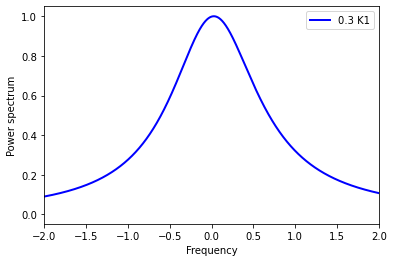

In [2]:
N = 25
a = destroy(N)
k1 = 1
k2 = 0.1 * k1 # so we're in the quantum limit of the VdP.


E = 2 * k1 
D = 0.3 * k1 
i = complex(0,1)
H =  D * (a.dag() * a) + (E)*(a + a.dag())

c1 = np.sqrt(2*k1) * a.dag() 
c2 = np.sqrt(2*k2) * (a**2)
Collapse = [c1 , c2]


wlist2 = np.linspace(-2, 2, 20000) * 2 * np.pi
spec2 = spectrum(H, wlist2, Collapse, a.dag(), a)  

# plot the spectra
fig, ax = plt.subplots(1, 1)

ax.plot(wlist2 , spec2/(spec2.max()), 'b', lw=2, label='0.3 K1')



ax.legend()
ax.set_xlabel('Frequency')
ax.set_ylabel('Power spectrum')
ax.set_xlim(-2,2)


wlist2[(spec2).argmax()] # This tells us the W observed.


# Ran a few different configurations of the N levels and wlist2 intervals 
# The more energy levels really slow down the run time, and dont change the result that much as in the steady state most
# of the occupied levels are in the 0 ,1 states. 
# Most important thing to increase the the wlist steps as to keep it sufficiently continuous 

# I could make some code to automate how to see how the result tends to a certain value.

Text(0, 0.5, '$ \\omega $ ')

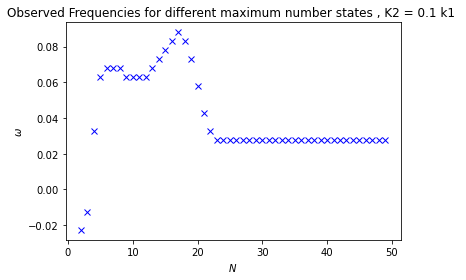

In [8]:
k1 = 1
k2 = 0.1 * k1

Max_N = 50
W_obs_N = []
Range = np.arange(2,Max_N)
for M in Range :
    a = destroy(M)
    H =  D * (a.dag() * a) + (E)*(a + a.dag())
    c1 = np.sqrt(2*k1) * a.dag() 
    c2 = np.sqrt(2*k2) * ( a * a)
    Collapse = [c1 , c2]


    wlist3 = np.linspace(-2, 2, 5000) * 2 * np.pi
    spec3 = spectrum(H, wlist3, Collapse, a.dag(), a)  

    
    W_obs_N.append(wlist3[(spec3).argmax()])

    
fig, axes = plt.subplots(1, 1)   
axes.plot(Range , W_obs_N, 'bx') 
plt.title("Observed Frequencies for different maximum number states , K2 = 0.1 k1 ")
plt.xlabel(r'$ N $ ')
plt.ylabel(r'$ \omega $ ') 


# Not a particularly nice looking graph but shows that any more than roughly 25 states get redundant.
    
    
# I will use N= 25 for my calculations as that doesnt take too long to work and we get same information about W observed.
  
    
# The convergance to an observed frequency will happen at different rates for different abosorption and emission rates
# That is something to keep in mind, this n=25 worked for this specific example 

# Could try produce code which will automate this N selection based on different max N levels.


Text(0, 0.5, '$ \\omega $ ')

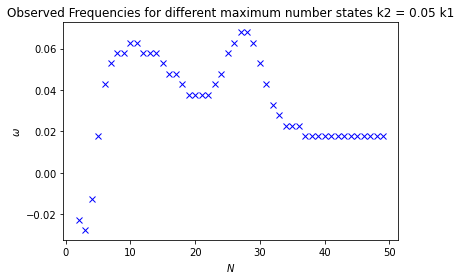

In [205]:
k2 = 0.05 * k1
Max_N = 50
W_obs_N = []
Range = np.arange(2,Max_N)
for M in Range :
    a = destroy(M)
    H =  D * (a.dag() * a) + (E)*(a + a.dag())
    c1 = np.sqrt(2*k1) * a.dag() 
    c2 = np.sqrt(2*k2) * ( a * a)
    Collapse = [c1 , c2]


    wlist3 = np.linspace(-2, 2, 5000) * 2 * np.pi
    spec3 = spectrum(H, wlist3, Collapse, a.dag(), a)  

    
    W_obs_N.append(wlist3[(spec3).argmax()])


fig, axes = plt.subplots(1, 1)   
axes.plot(Range , W_obs_N, 'bx') 
plt.title("Observed Frequencies for different maximum number states k2 = 0.05 k1")
plt.xlabel(r'$ N $ ')
plt.ylabel(r'$ \omega $ ') 

Text(0, 0.5, '$ \\omega $ ')

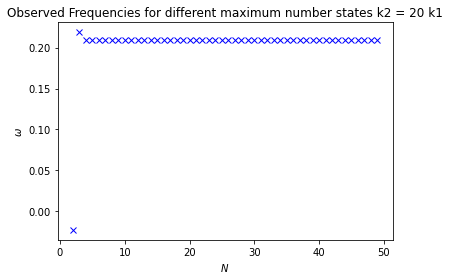

In [206]:
k2 = 20* k1
Max_N = 50
W_obs_N = []
Range = np.arange(2,Max_N)
for M in Range :
    a = destroy(M)
    H =  D * (a.dag() * a) + (E)*(a + a.dag())
    c1 = np.sqrt(2*k1) * a.dag() 
    c2 = np.sqrt(2*k2) * ( a * a)
    Collapse = [c1 , c2]


    wlist3 = np.linspace(-2, 2, 5000) * 2 * np.pi
    spec3 = spectrum(H, wlist3, Collapse, a.dag(), a)  

    
    W_obs_N.append(wlist3[(spec3).argmax()])

    
fig, axes = plt.subplots(1, 1)   
axes.plot(Range , W_obs_N, 'bx') 
plt.title("Observed Frequencies for different maximum number states k2 = 20 k1")
plt.xlabel(r'$ N $ ')
plt.ylabel(r'$ \omega $ ') 

Text(0, 0.5, '$ \\omega $ ')

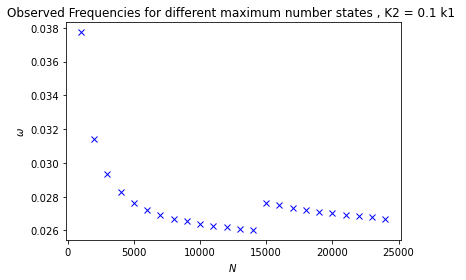

In [216]:
k1 = 1
k2 = 0.1 * k1

Max_N = 25

W_obs_N = []
for freq_int in np.arange(1000,25000,1000) :
    a = destroy(N)
    H =  D * (a.dag() * a) + (E)*(a + a.dag())
    c1 = np.sqrt(2*k1) * a.dag() 
    c2 = np.sqrt(2*k2) * ( a * a)
    Collapse = [c1 , c2]


    wlist3 = np.linspace(-2, 2, freq_int) * 2 * np.pi
    spec3 = spectrum(H, wlist3, Collapse, a.dag(), a)  

    
    W_obs_N.append(wlist3[(spec3).argmax()])


fig, axes = plt.subplots(1, 1)   
axes.plot(np.arange(1000,25000,1000), W_obs_N, 'bx') 
plt.title("Observed Frequencies for different frequency intervals when K2 = 0.1 k1 ")
plt.xlabel(r'$ no. Intervals $ ')
plt.ylabel(r'$ \omega $ ') 

# Again more intervals requires more time to run the code, I'm opting to use 10,000 steps as this returns
# a similar result to that of running 20K steps.

Text(0, 0.5, '$ \\omega $ /   $K1$ ')

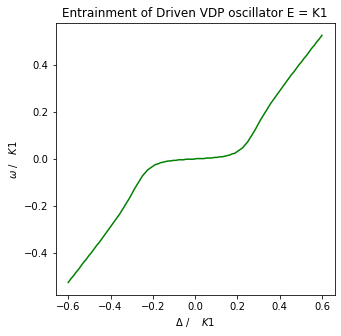

In [8]:
#So we can plot the diagram but what we're really interested in is the observed frequency so that we can 
# play around with drive and detuning terms to learn about synchronisation.
N = 25
k1 = 1
k2 = 0.1 * k1
E = 1 * k1

a = destroy(N)
c1 = np.sqrt(k1) * a.dag() 
c2 = np.sqrt(k2) * (a**2)
Collapse = [c1 , c2]

d_range = np.linspace(-0.6,0.6,100)
wlist2 = np.linspace(-2, 2,10000) * 2 * np.pi
frequency_list = []


for d in d_range:
    
    H = d* k1 *(a.dag() * a) + (E)*(a + a.dag())
    
    spec2 = spectrum(H, wlist2, Collapse, a.dag(), a)

    W_observed = wlist2[spec2.argmax()]
    
    frequency_list.append(W_observed)
    




fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(d_range , frequency_list , 'g' )
plt.title("Entrainment of Driven VDP oscillator E = K1")
plt.xlabel(r'$ \Delta $ /    $K1$ ')
plt.ylabel(r'$ \omega $ /   $K1$ ') 




# Managed to reproduce a graph of the observed frequency against ranges of detuning
# We can see a clear entrainment of the rhytm which, at small detunings appears to lock i.e synchronise.

# The "staircase" shape the graph forms is a result of not enough data points and quantum noise.

Text(0, 0.5, '$ \\omega $ /   $K1$ ')

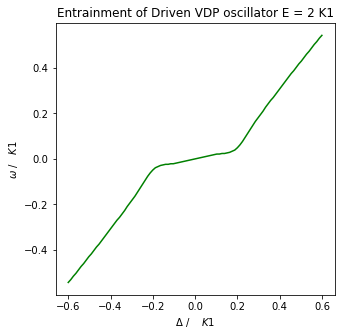

In [6]:
N = 30
k1 = 1
k2 = 0.05 * k1
E = k1

a = destroy(N)
c1 = np.sqrt(k1) * a.dag() 
c2 = np.sqrt(k2) * (a**2)
Collapse = [c1 , c2]

d_range = np.linspace(-0.6,0.6,100)
wlist2 = np.linspace(-2, 2,10000) * 2 * np.pi
frequency_list_classical = []


for d in d_range:
    
    H = d* k1 *(a.dag() * a) + (E)*(a + a.dag())
    
    spec2 = spectrum(H, wlist2, Collapse, a.dag(), a)

    W_observed = wlist2[spec2.argmax()]
    
    frequency_list_classical.append(W_observed)
    
    
fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(d_range , frequency_list_classical , 'g' )
plt.title("Entrainment of Driven VDP oscillator E = K1")
plt.xlabel(r'$ \Delta $ /    $K1$ ')
plt.ylabel(r'$ \omega $ /   $K1$ ')

# We can see for this oscillator in the more classical regime i.e k2 = 0.05k1, that there is still entrainment of the frequency 
# there isn't however, a region where we can say that locking occurs.

# Quantum case more succesptible to locking? would agree with the Wigner Functions in the Tony lee paper 

Text(0, 0.5, '$ \\omega $ /   $K1$ ')

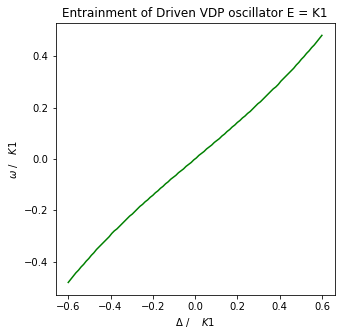

In [9]:
N = 10
k1 = 1
k2 = 20 * k1
E = 1 * k1

a = destroy(N)
c1 = np.sqrt(k1) * a.dag() 
c2 = np.sqrt(k2) * (a**2)
Collapse = [c1 , c2]

d_range = np.linspace(-0.6,0.6,100)
wlist2 = np.linspace(-2, 2,10000) * 2 * np.pi
frequency_list_quantum = []


for d in d_range:
    
    H = d* k1 *(a.dag() * a) + (E)*(a + a.dag())
    
    spec2 = spectrum(H, wlist2, Collapse, a.dag(), a)

    W_observed = wlist2[spec2.argmax()]
    
    frequency_list_quantum.append(W_observed)
    




fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(d_range , frequency_list_quantum , 'g' )
plt.title("Entrainment of Driven VDP oscillator E = K1")
plt.xlabel(r'$ \Delta $ /    $K1$ ')
plt.ylabel(r'$ \omega $ /   $K1$ ') 

# both the classical and quantum modes agree, the quantum limit of the system however doesnt have a synchronisation region.


In [10]:
np.save('RVdP Observed freq vs detuning k2 = 0.1k1 ',frequency_list)
np.save('RVdP Observed freq vs detuning k2 = 0.05k1 ',frequency_list_classical)
np.save('RVdP Observed freq vs detuning k2 = 20k1 ',frequency_list_quantum)

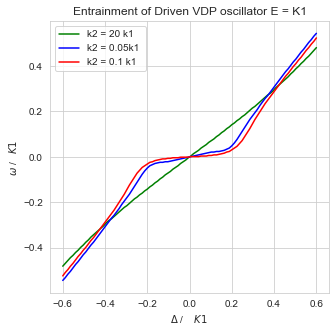

In [14]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(d_range , frequency_list_quantum , 'g' , label = 'k2 = 20 k1')
axes.plot(d_range , frequency_list_classical , 'b' , label = 'k2 = 0.05k1 ')
axes.plot(d_range , frequency_list, 'r' , label = 'k2 = 0.1 k1') 

plt.title("Entrainment of Driven VDP oscillator E = K1")
plt.xlabel(r'$ \Delta $ /    $K1$ ')
plt.ylabel(r'$ \omega $ /   $K1$ ') 
plt.legend()

#overlapped we can see that the quantum model and the classical limit both agree, the quantum model might be slightly
# more prone to synchronisation as the region is slightly bigger.

# What is clear is how the quantum limit clearly shows no synchronisation region.